In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

## Features to include for clustering (draft)

* danceability
* energy
* loudness
* speechiness
* instrumentalness
* liveness
* valence
* tempo

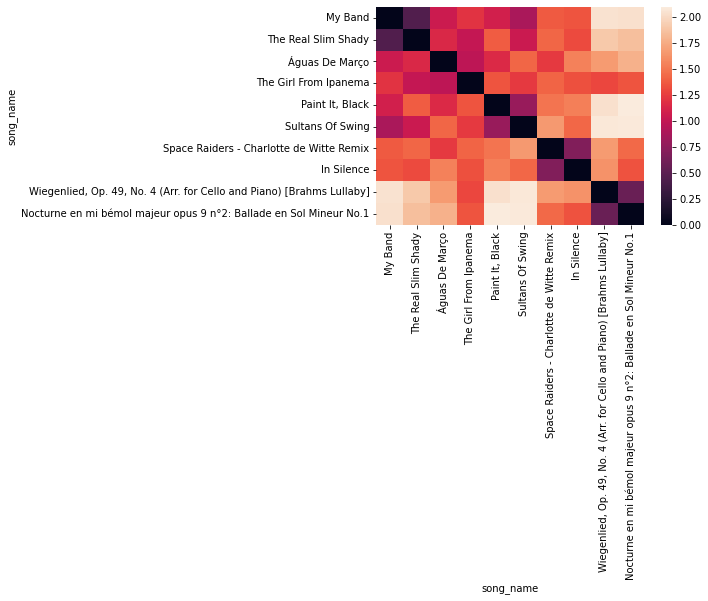

In [10]:
# import data
audio_features = pd.read_csv('data/df_audio_features_10.csv')

# choose columns to include in the model
relevant_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']
features_only = audio_features[relevant_cols]

# initialize transformer to scale data to [0, 1]
min_max_scaler = MinMaxScaler(feature_range= (0, 1))
min_max_scaler.fit(features_only)
features_only_scaled = min_max_scaler.transform(features_only)

features_only_scaled = pd.DataFrame(features_only_scaled,
                                    index= audio_features.song_name,
                                    columns= features_only.columns)

# compute pairwise distances between songs
euclidian_distances = pd.DataFrame(pairwise_distances(features_only_scaled), index= audio_features.song_name, columns= audio_features.song_name)

# visualize pairwise distances in heatmap
sns.heatmap(euclidian_distances);

## Big dataset

In [4]:
# import data
features_big = pd.read_csv('data/df_audio_features_1000.csv')

# choose columns to include in the model (for now all numerical columns)
cols = ['danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms']

features_only = features_big[cols]

### Min max scaling

In [5]:
# initialize transformer to scale data to [0, 1]
min_max_scaler = MinMaxScaler(feature_range= (0, 1))
min_max_scaler.fit(features_only)
features_only_min_max_scaled = min_max_scaler.transform(features_only)

min_max_scaled = pd.DataFrame(features_only_min_max_scaled,
                                index= features_big.name,
                                columns= features_only.columns)

### Standard scaling

In [6]:
# initialize transformer to remove the mean and scale by variance 
standard_scaler = StandardScaler()
standard_scaler.fit(features_only)
features_only_standard_scaled = standard_scaler.transform(features_only)

standard_scaled = pd.DataFrame(features_only_standard_scaled,
                                index= features_big.name,
                                columns= features_only.columns)

### Robust scaling

In [7]:
# initialize transformer to remove the median and scale by quantile range (more robust to outliers than standard scaler)
robust_scaler = RobustScaler()
robust_scaler.fit(features_only)
features_only_robust_scaled = robust_scaler.transform(features_only)

robust_scaled = pd.DataFrame(features_only_robust_scaled,
                                index= features_big.name,
                                columns= features_only.columns)

### Quantile Transforming

In [8]:
# initialize transformer to transform data to uniform distribution
quantile_transformer = QuantileTransformer()
quantile_transformer.fit(features_only)
features_only_quantile_transformed = quantile_transformer.transform(features_only)

quantile_transformed = pd.DataFrame(features_only_quantile_transformed,
                                index= features_big.name,
                                columns= features_only.columns)

## Visualize different scaling/transformation methods

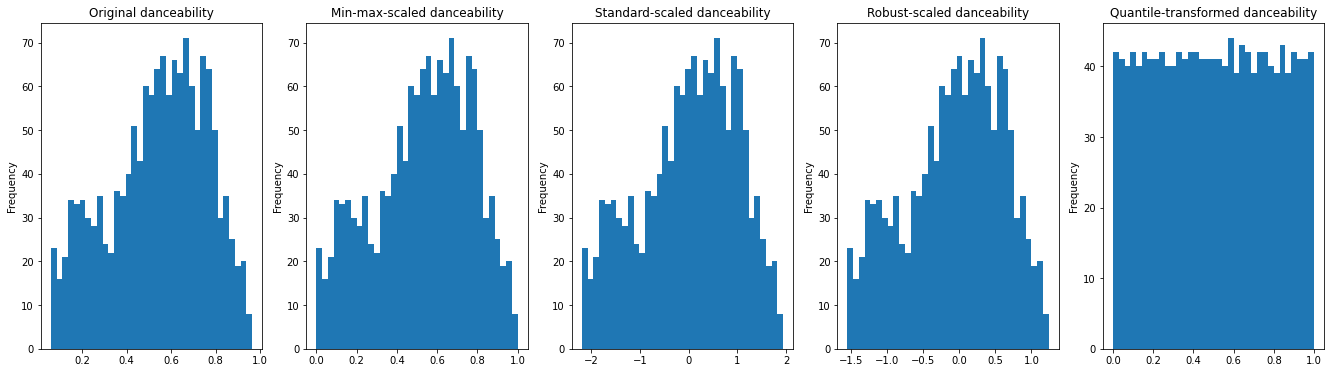

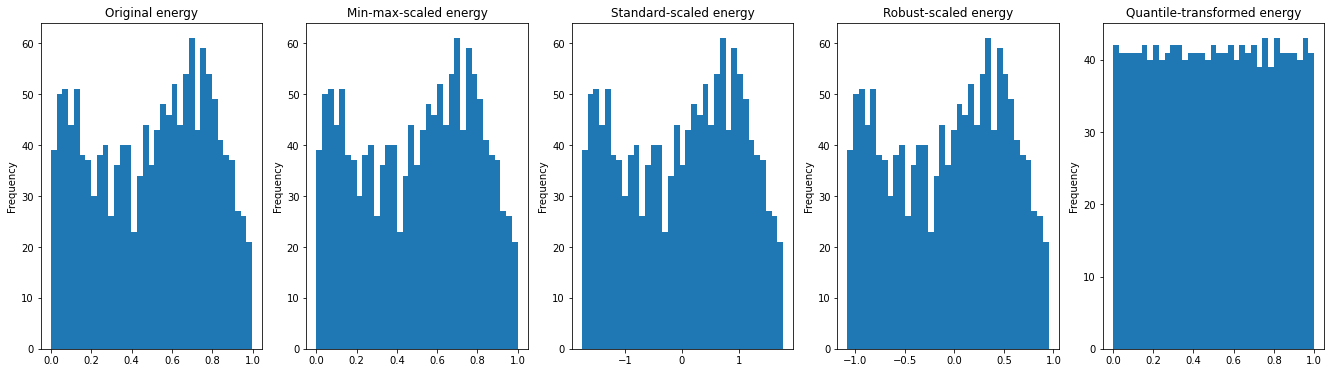

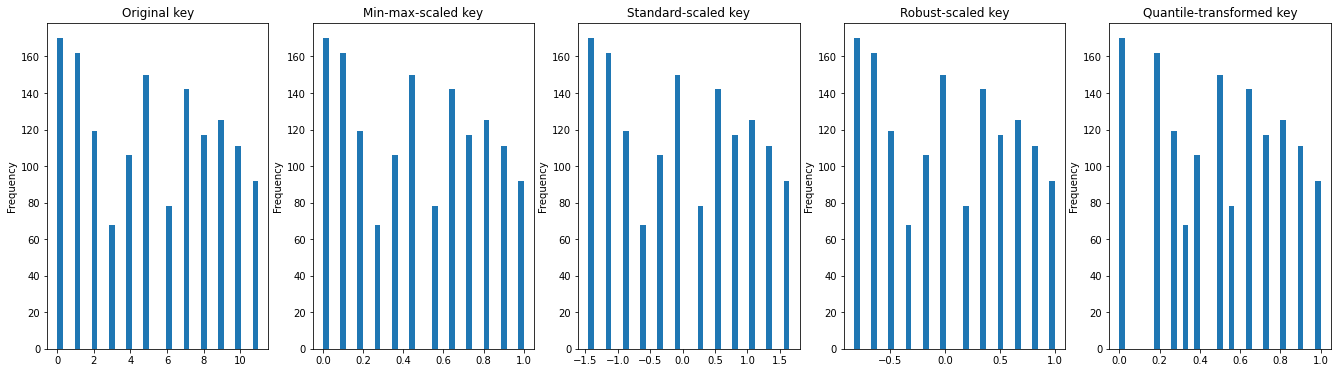

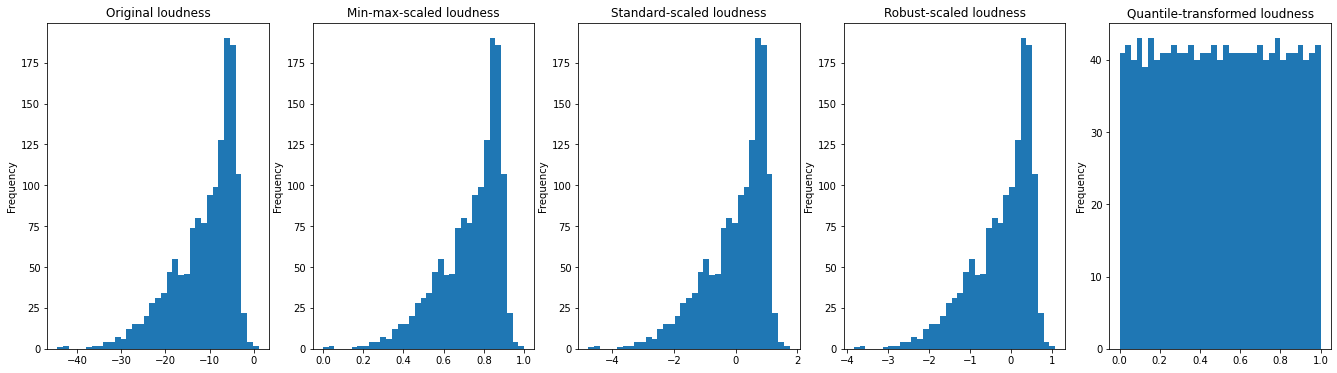

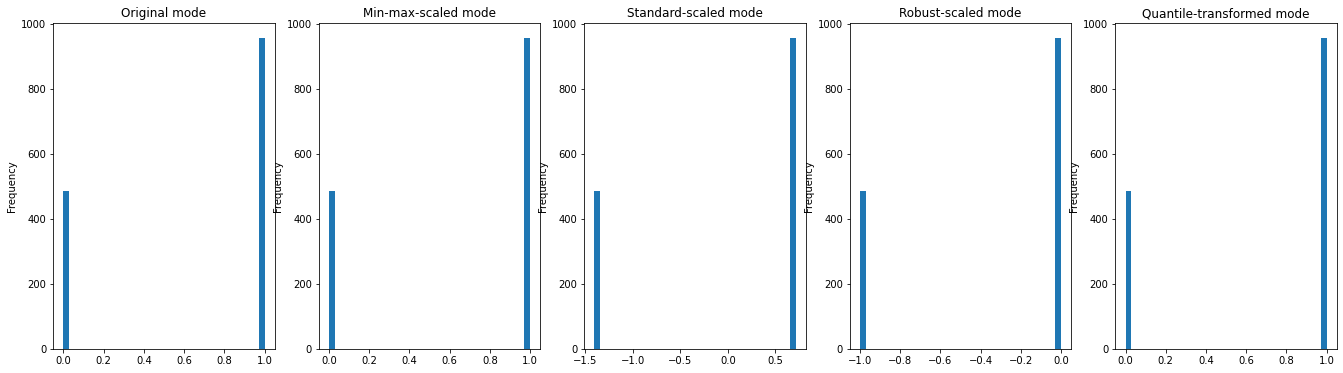

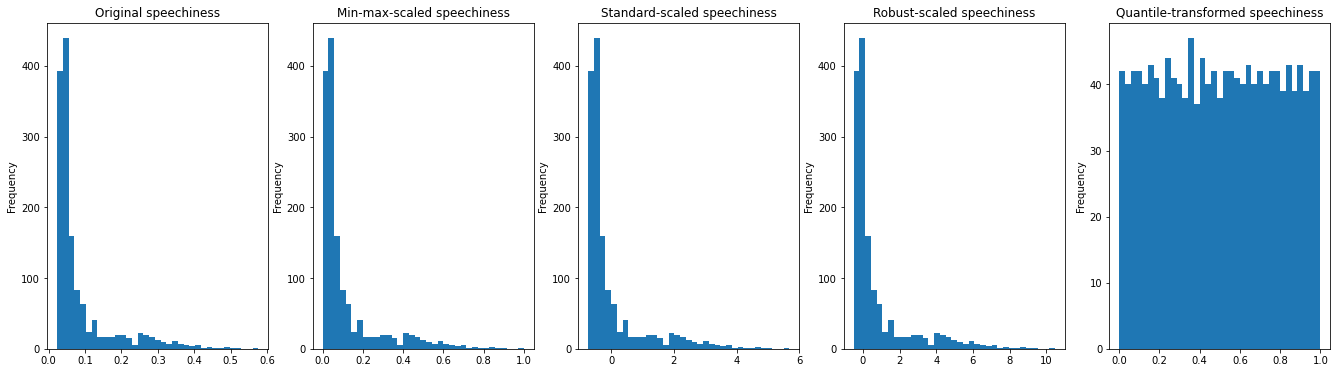

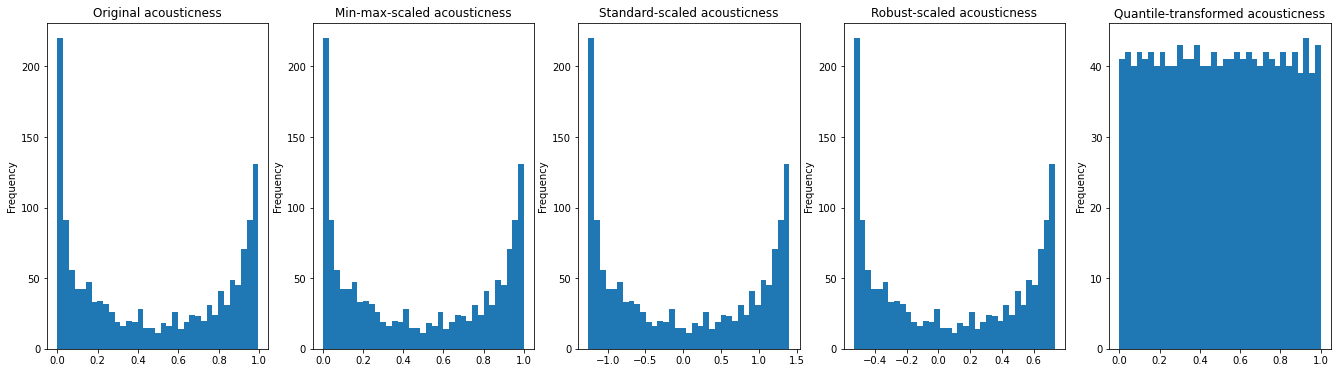

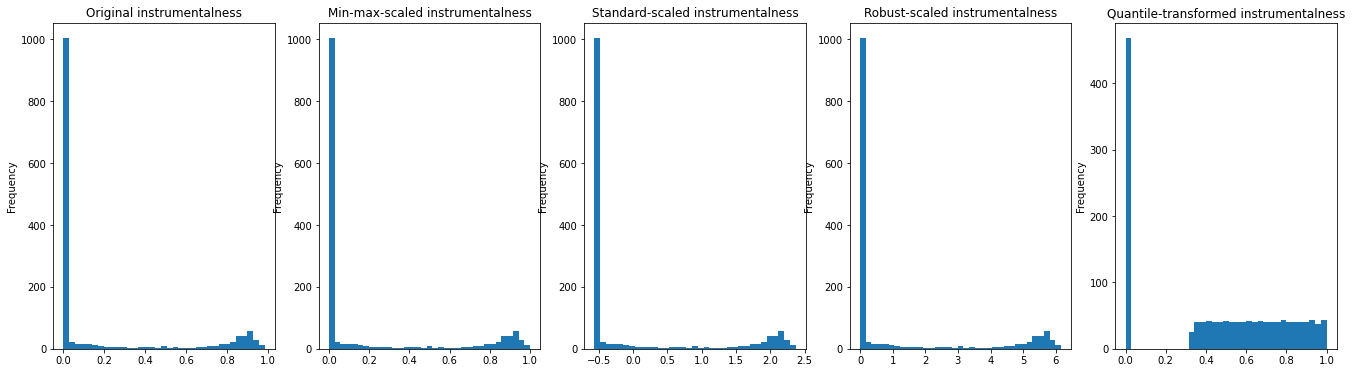

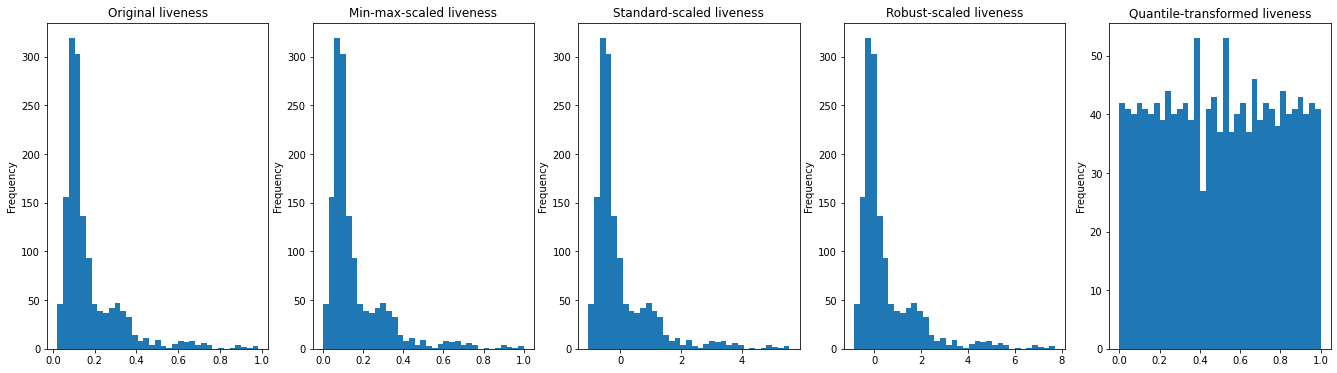

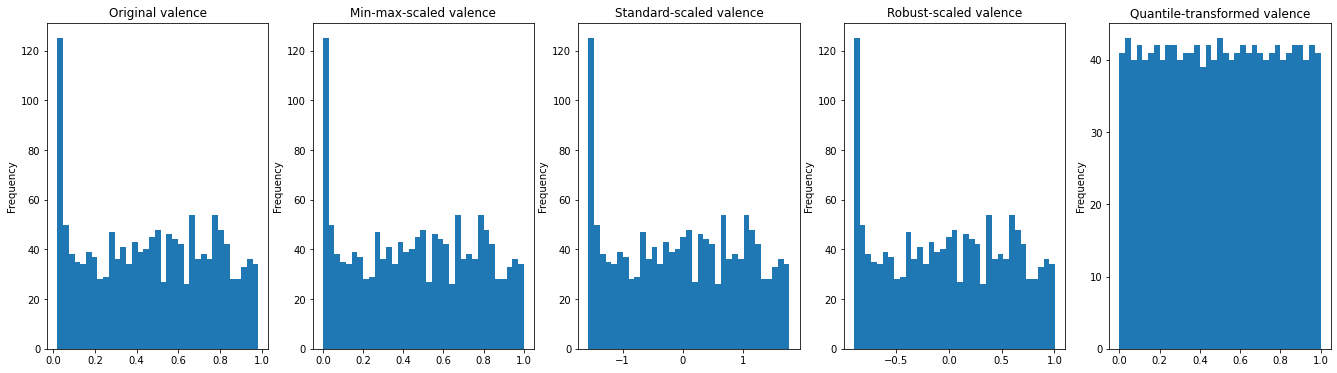

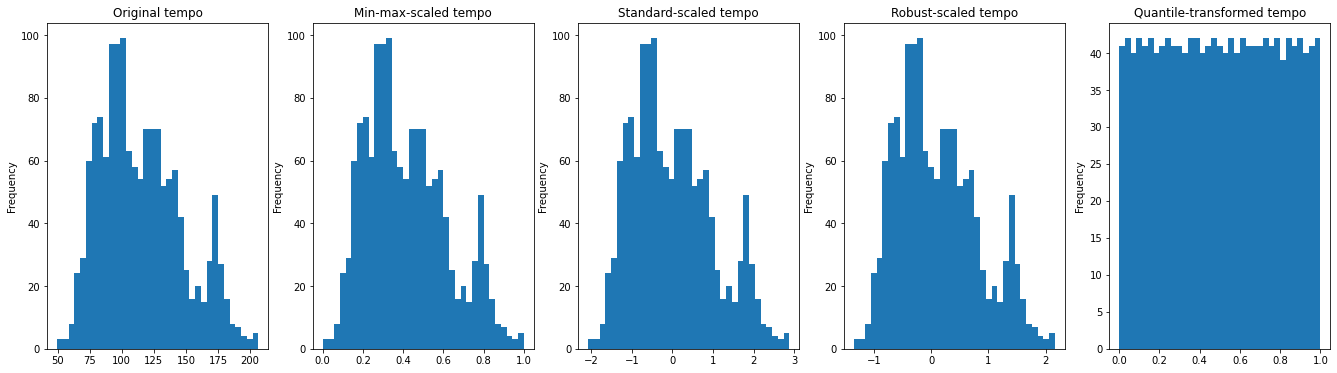

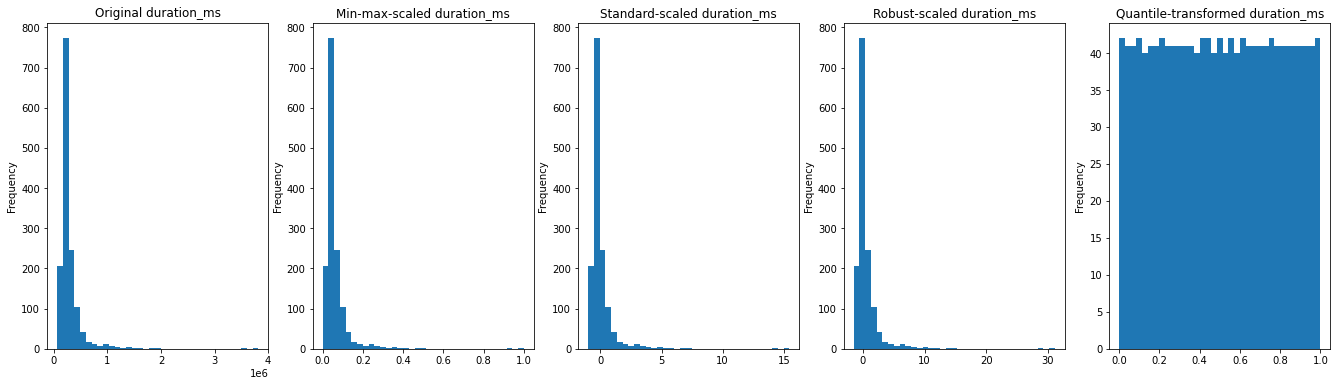

In [9]:
# loop through each relevant column to compare distributions

for var in cols:
    plt.figure(figsize=(23, 6))
    
    # plot original data
    plt.subplot(1, 5, 1)
    features_big[var].plot.hist(bins=35)
    plt.title(f"Original {var}")
    
    # plot min-max scaled data
    plt.subplot(1, 5, 2)
    min_max_scaled[var].plot.hist(bins=35)
    plt.title(f"Min-max-scaled {var}")

    # plot standard scaled data
    plt.subplot(1, 5, 3)
    standard_scaled[var].plot.hist(bins=35)
    plt.title(f"Standard-scaled {var}")

    # plot robust scaled data
    plt.subplot(1, 5, 4)
    robust_scaled[var].plot.hist(bins=35)
    plt.title(f"Robust-scaled {var}")

    # plot quantile transformed data
    plt.subplot(1, 5, 5)
    quantile_transformed[var].plot.hist(bins=35)
    plt.title(f"Quantile-transformed {var}")
    
    # show all plots
    plt.show()